>> ## Data Breach Analytics 2005 - 2017 
> (Part IV - Supervised Text Classification Modeling - Descriptions)
#### by Miriam Rodriguez 

## Text Preprocessing and Feature Generation 

# Descriptive Analytics on Incident Descriptions

In [25]:
import warnings
warnings.filterwarnings(action= 'ignore')  # To ignore all warnings that arise here to enhance clarity

In [2]:
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import numpy as np
from collections import Counter

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#pip install scikit-plot 
import scikitplot as skplt


In [3]:
#import breach data ... open or read the breach data
df = pd.read_csv("databreach_cleaned.csv")
df.head(2)

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
0,2006,"Deloitte & Touche, McAfee",United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",37.090240,-95.712891,5,2,0,2,72466970
1,2007,"TennCare, Americhoice Inc.",United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",35.960638,-83.920739,5,6,0,3,75725457


In [4]:
df_breaches = df[["Description", "Breach_Type"]]
df_breaches.head(2)

,Description,Breach_Type
0,"An external auditor lost a CD with names, Soci...",PORT
1,"There are 67,000 TennCare \r\n enro...",PORT


In [5]:
df_breaches.to_csv('databreach_class.csv', index=False, header=None)

In [6]:
# first column
breach_data = []
# second colummn
breach_labels = []
# both columns
breaches = []

openfile = open('databreach_class.csv', 'rb')

r = csv.reader(openfile)

for i in r:
    breaches.append(i)
    breach_data.append(i[0])
    breach_labels.append(i[1])
    
openfile.close()

In [7]:
#entire data
print len(breaches)
#texts only
print len(breach_data)
#labels only
print len(breach_labels)

8177
8177
8177


In [8]:
# view first row
breaches[:1]

[['An external auditor lost a CD with names, Social Security numbers and stock holdings in McAfee of current and former McAfee employees.\xc2\xa0 Three thousand current employees and 6,000 former employees were affected.\xc2\xa0 Current and former employees received two years of free credit monitoring services from Equifax.',
  'PORT']]

In [9]:
tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore')
tfidf = tfidf_vectorizer.fit_transform(breach_data)
print tfidf.shape
print tfidf


(8177, 16219)
  (0, 2493)	0.060314324258
  (0, 6556)	0.143551801273
  (0, 2915)	0.189364070114
  (0, 9491)	0.124730164997
  (0, 3999)	0.182044031855
  (0, 16003)	0.0707622087161
  (0, 10343)	0.0519451279513
  (0, 13719)	0.0541928937298
  (0, 13287)	0.0496412338524
  (0, 10653)	0.0490068498692
  (0, 2509)	0.146089761614
  (0, 14058)	0.207889865599
  (0, 7850)	0.202413302435
  (0, 8184)	0.0517934983778
  (0, 9783)	0.502682468579
  (0, 10767)	0.0637640923781
  (0, 5068)	0.334656319565
  (0, 6981)	0.284454952703
  (0, 6160)	0.347144397182
  (0, 14678)	0.125048891812
  (0, 14669)	0.184571724076
  (0, 1)	0.0922331931656
  (0, 15862)	0.0567680166376
  (0, 2218)	0.0690384137876
  (0, 12346)	0.117582702848
  :	:
  (8174, 8599)	0.116319726827
  (8174, 13820)	0.133303412349
  (8174, 9946)	0.432056774612
  (8174, 14558)	0.432056774612
  (8174, 1450)	0.144018924871
  (8175, 10767)	0.151789135187
  (8175, 8340)	0.157599763968
  (8175, 3727)	0.285878721632
  (8175, 9419)	0.290790833163
  (8175, 3568)

In [10]:
# removing stopwords

tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore', stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(breach_data)
print tfidf.shape
print tfidf




(8177, 15940)
  (0, 6475)	0.155764154164
  (0, 2885)	0.205473800738
  (0, 9361)	0.135341308693
  (0, 3945)	0.197531026369
  (0, 10196)	0.0563642451471
  (0, 13521)	0.0588032346418
  (0, 13103)	0.053864352339
  (0, 10494)	0.0531759995376
  (0, 13852)	0.225575637415
  (0, 7738)	0.219633167718
  (0, 9649)	0.545447070931
  (0, 5011)	0.36312646787
  (0, 6089)	0.376676941148
  (0, 14441)	0.20027375643
  (0, 1)	0.100079728655
  (0, 2215)	0.0749117045769
  (0, 12163)	0.127585791965
  (0, 15870)	0.137110973407
  (0, 6965)	0.13443772504
  (0, 4917)	0.0869892162545
  (0, 10042)	0.131774596254
  (0, 13201)	0.0983887113793
  (0, 6233)	0.22346399514
  (1, 9361)	0.391017863929
  (1, 10196)	0.0814216551928
  :	:
  (8174, 15441)	0.211897835815
  (8174, 7800)	0.388787627329
  (8174, 5903)	0.125949046743
  (8174, 7484)	0.131778175721
  (8174, 8478)	0.122969370463
  (8174, 13615)	0.140923961432
  (8174, 9811)	0.456756141263
  (8174, 14348)	0.456756141263
  (8174, 1450)	0.152252047088
  (8175, 8221)	0.1660

In [11]:
# view features or terms

tfidf_vectorizer.get_feature_names()

[u'00',
 u'000',
 u'0004',
 u'0008',
 u'00081',
 u'001',
 u'0019',
 u'00191',
 u'0033',
 u'004',
 u'005',
 u'0052',
 u'00561',
 u'00577',
 u'006',
 u'0069',
 u'007',
 u'008',
 u'0083',
 u'009',
 u'00am',
 u'00pm',
 u'01',
 u'012',
 u'01262',
 u'013',
 u'0139',
 u'0142',
 u'015',
 u'015saint',
 u'016',
 u'01617',
 u'017',
 u'0171',
 u'018',
 u'01887',
 u'019',
 u'02',
 u'020',
 u'0202',
 u'0217',
 u'0218',
 u'023',
 u'024',
 u'025',
 u'026',
 u'027',
 u'0281',
 u'02811',
 u'029',
 u'0299',
 u'02991',
 u'03',
 u'031',
 u'034',
 u'035',
 u'036',
 u'0374',
 u'03741',
 u'0379',
 u'038',
 u'0382',
 u'04',
 u'041',
 u'042',
 u'044',
 u'0447',
 u'0448',
 u'046',
 u'047',
 u'049',
 u'05',
 u'050',
 u'0529',
 u'054',
 u'055',
 u'058',
 u'059',
 u'06',
 u'060',
 u'062',
 u'0628',
 u'06281',
 u'063',
 u'067',
 u'06749',
 u'069',
 u'07',
 u'071',
 u'0710',
 u'072',
 u'074',
 u'075',
 u'076',
 u'0761',
 u'078',
 u'079',
 u'0796',
 u'08',
 u'080',
 u'082',
 u'085',
 u'087',
 u'088',
 u'0888',
 u'0888

In [12]:
# which term has the vector value 2000

tfidf_vectorizer.get_feature_names()[2000]

u'accophonesunt'

In [13]:
# which terms are vector 1122, 2124, 3125?

from operator import itemgetter
itemgetter(1122,2124,2125)(tfidf_vectorizer.get_feature_names())

(u'581', u'adhesive', u'adhs')

#### Document-Term Matrix (DTM) This is a matrix view of documents (rows), tokens (columns), and their counts.

In [14]:
# document-term matrix using tfidf

tfidf_matrix = tfidf_vectorizer.fit_transform(breach_data).toarray()
print tfidf_matrix

[[ 0.          0.10007973  0.         ...,  0.          0.          0.        ]
 [ 0.          0.14457139  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [15]:
# Document Term Matrix
pd.DataFrame(tfidf_matrix,index=breach_data,columns=tfidf_vectorizer.get_feature_names()).head()

,00,000,0004,0008,00081,001,0019,00191,0033,004,...,zoo,zoos,zotec,zpizza,zuckerberg,zurich,zybez,zymo,œadpâ,œinspireâ
"An external auditor lost a CD with names, Social Security numbers and stock holdings in McAfee of current and former McAfee employees. Three thousand current employees and 6,000 former employees were affected. Current and former employees received two years of free credit monitoring services from Equifax.",0.0,0.100080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"There are 67,000 TennCare \r\r\n enrollees at risk of identity theft after a courier service lost their \r\r\n personal information. The lost information includes names, Social \r\r\n Security Numbers, birthdays and addresses.",0.0,0.144571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A laptop computer was stolen from a vehicle.,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Fidelity laptop used by a former Fidelity employee was discarded and recovered by a non-affiliated person. The employee had taken the laptop home after believing it had been decommissioned from business use by Fidelity. Participants and beneficiaries of participants in the Dairy Farmers of America Defined Benefit plan had their names and Social Security numbers exposed. At least 69 New York residents were affected by the breach, but the total number of affected individuals nationwide was not revealed.",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A former contract worker of a Japanese commercial printing company stole nearly 9 million pieces of private data on customers from 43 clients, including U.S. companies. The stolen data includes confidential information such as names, addresses and credit card numbers intended for use in direct mailing and other printing services. Customers of U.S.-based American Home Assurance Co. and Toyota Motor were affected.",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
x_train, x_test, y_train, y_test = train_test_split(breach_data, breach_labels, test_size=0.2, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(6541, 6541, 1636, 1636)

In [17]:
# 199 documents (training dataset)
x_train, y_train

(['\\N\r\r\nLocation of breached information: Paper/Films\r\r\nBusiness associate present: Yes\r\r\n',
  'BayBio.org has notified individuals of a data breach to their online payment system. The non-profit organization has notified that the hacking to their payment system compromised credit card numbers in process.The hacker inserted files that captured keystrokes of visitors to their site which included credit card numbers when individuals were either paying for a membership or an event being held by the non-profit. Payments are being taken by phone until the breach has been repaired. More Information: http://oag.ca.gov/ecrime/databreach/reports/sb24-46727\xc2\xa0',
  'name, dob, contact information, ssn, banking info, compensation info, insurance info\r\r\nLocation of breached information: Laptop\r\r\nBusiness associate present: No\r\r\n',
  "The January 8 theft of a billing manager's laptop resulted in the exposure of patient information. \xc2\xa0It was stolen from the manager's car

In [18]:
X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)
print X_train[:2]
print "+++++++++++++++++++++++++++++++++++++++++"
print X_test

  (0, 8350)	0.263815856999
  (0, 3125)	0.257896753826
  (0, 7398)	0.142384952464
  (0, 9821)	0.418457782798
  (0, 6028)	0.443702081982
  (0, 3270)	0.259046136206
  (0, 2476)	0.266671999995
  (0, 10448)	0.26538753018
  (0, 14333)	0.512824660381
  (1, 7398)	0.0298579749738
  (1, 2767)	0.231211842311
  (1, 9663)	0.160710814141
  (1, 9380)	0.168992041017
  (1, 7353)	0.143797143476
  (1, 4569)	0.0672705809942
  (1, 3119)	0.110392552155
  (1, 9590)	0.0972614249665
  (1, 9937)	0.203533478275
  (1, 9332)	0.274822983353
  (1, 10576)	0.353589032249
  (1, 9665)	0.141920718129
  (1, 6667)	0.119003776869
  (1, 4011)	0.0823662849245
  (1, 4390)	0.143942376536
  (1, 3380)	0.153809399414
  :	:
  (1, 6665)	0.107835043013
  (1, 7454)	0.1817314902
  (1, 6022)	0.0990954707085
  (1, 3374)	0.16910815713
  (1, 7918)	0.203276470833
  (1, 13886)	0.173966285031
  (1, 12103)	0.111920853875
  (1, 7288)	0.0637921834375
  (1, 9934)	0.179977148369
  (1, 8755)	0.157715842312
  (1, 5682)	0.165990641108
  (1, 6857)	0.1

In [19]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)  

0.64058679706601462

In [20]:
predicted

array(['HACK', 'HACK', 'PHYS', ..., 'HACK', 'PORT', 'HACK'],
      dtype='|S4')

In [22]:
y_test

['PORT',
 'HACK',
 'PHYS',
 'PORT',
 'DISC',
 'INSD',
 'DISC',
 'DISC',
 'PHYS',
 'INSD',
 'HACK',
 'HACK',
 'HACK',
 'PHYS',
 'HACK',
 'INSD',
 'DISC',
 'DISC',
 'UNKN',
 'PORT',
 'PORT',
 'DISC',
 'INSD',
 'STAT',
 'HACK',
 'HACK',
 'HACK',
 'PORT',
 'PORT',
 'DISC',
 'DISC',
 'PHYS',
 'PHYS',
 'PORT',
 'DISC',
 'HACK',
 'HACK',
 'PORT',
 'HACK',
 'PHYS',
 'PORT',
 'UNKN',
 'HACK',
 'HACK',
 'PHYS',
 'PHYS',
 'PORT',
 'HACK',
 'HACK',
 'UNKN',
 'INSD',
 'DISC',
 'PHYS',
 'HACK',
 'PHYS',
 'DISC',
 'HACK',
 'PORT',
 'PORT',
 'PORT',
 'DISC',
 'HACK',
 'HACK',
 'DISC',
 'HACK',
 'PHYS',
 'DISC',
 'HACK',
 'INSD',
 'PHYS',
 'HACK',
 'PHYS',
 'HACK',
 'HACK',
 'PORT',
 'PHYS',
 'HACK',
 'HACK',
 'PORT',
 'CARD',
 'PORT',
 'HACK',
 'PORT',
 'HACK',
 'PHYS',
 'HACK',
 'HACK',
 'HACK',
 'PORT',
 'PORT',
 'INSD',
 'HACK',
 'PORT',
 'PHYS',
 'PHYS',
 'PHYS',
 'HACK',
 'PHYS',
 'PORT',
 'HACK',
 'PHYS',
 'UNKN',
 'PHYS',
 'PHYS',
 'DISC',
 'DISC',
 'DISC',
 'INSD',
 'HACK',
 'DISC',
 'STAT',
 

## Model Performance Evaluation

In [23]:
print '\n overall accuracy:'
print metrics.accuracy_score(y_test, predicted)

print '\n confusion_matrix:'
print metrics.confusion_matrix(y_test, predicted)

print '\n Here is the classification report:'
print metrics.classification_report(y_test, predicted)


 overall accuracy:
0.640586797066

 confusion_matrix:
[[  0   0  10   2   0   0   0   0]
 [  0 105 126   0  99   1   0   0]
 [  0   4 464   0  35   0   0   0]
 [  0   6  70  23   6   2   0   0]
 [  0  14  30   1 277  21   0   0]
 [  0   3  34   0  24 179   0   0]
 [  0   0  15   0   8  25   0   0]
 [  0   2  34   0  13   3   0   0]]

 Here is the classification report:
             precision    recall  f1-score   support

       CARD       0.00      0.00      0.00        12
       DISC       0.78      0.32      0.45       331
       HACK       0.59      0.92      0.72       503
       INSD       0.88      0.21      0.35       107
       PHYS       0.60      0.81      0.69       343
       PORT       0.77      0.75      0.76       240
       STAT       0.00      0.00      0.00        48
       UNKN       0.00      0.00      0.00        52

avg / total       0.64      0.64      0.59      1636



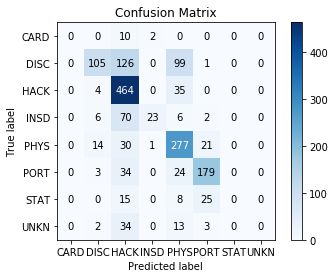

In [26]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=predicted)
plt.show()

Results:
- Overall accuracy = 0.640586797066
- Highest accuracy shows 'Hack' with 464 correct classifications
- Next highest is 'Phys' with 277 correct classifications, then 'PORT' with 179.
-    posts correctly classified as 
-    posts correctly classified as 
- 0  posts were false positive
- 1  post misclassified as false negative

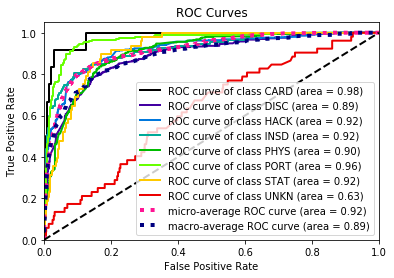

In [28]:
probas = nb.predict_proba(X_test)
skplt.plot_roc_curve(y_true=y_test, y_probas=probas)
plt.show()

### Explanation of the ROC Curves: 









In [29]:
def most_informative_feature_for_binanry_classification(vectorizer, classifier, n=50):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print "========================================="

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binanry_classification(tfidf_vectorizer, nb, n=10)


('CARD', -9.5936704393019205, u'00')
('CARD', -9.5936704393019205, u'0008')
('CARD', -9.5936704393019205, u'00081')
('CARD', -9.5936704393019205, u'001')
('CARD', -9.5936704393019205, u'0019')
('CARD', -9.5936704393019205, u'00191')
('CARD', -9.5936704393019205, u'004')
('CARD', -9.5936704393019205, u'005')
('CARD', -9.5936704393019205, u'0052')
('CARD', -9.5936704393019205, u'00561')
('DISC', -7.7422946586991328, u'card')
('DISC', -7.8212847451913934, u'cards')
('DISC', -7.8436902101575479, u'skimming')
('DISC', -7.8863658930022513, u'credit')
('DISC', -8.0521129302625294, u'debit')
('DISC', -8.1904166341059863, u'gas')
('DISC', -8.2616703384589432, u'charges')
('DISC', -8.2895766897429031, u'customers')
('DISC', -8.3102377076289109, u'device')
('DISC', -8.3288038157239903, u'fraudulent')


In [30]:
# combining feature engineering and model building
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', MultinomialNB())])

In [31]:
nb_pipeline = nb_pipeline.fit(x_train, y_train)
nb_pipeline

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [32]:
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.62286063569682149

##### The accuracy is less than the confusion matrix.

In [33]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.62286063569682149

### kNeighbors Classifier (kNN) 

In [34]:
knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.67909535452322733

##### This is the best so far.

## Use SVM to get prediction rate and evaluate.

In [35]:
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.78545232273838628

##### SVM has the best predicted rate.

In [36]:
import timeit
start_time = timeit.default_timer()

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)

print np.mean(predicted == y_test)


elapsed = timeit.default_timer() - start_time
print "%s %s" % ("this processing has taken", elapsed)

0.785452322738
this processing has taken 103.111821778


In [37]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', MultinomialNB())])

In [38]:
parameters = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'tfidf__min_df': [1, 2, 5],
              'tfidf__max_df': [0.9, 0.8, 0.7],
              'clf__alpha': (0.01, 0.001, 1),
}

In [39]:
gs_clf = GridSearchCV(nb_pipeline, parameters, n_jobs=6,verbose=10)
gs_clf.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   10.8s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   19.2s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   25.4s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   35.6s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   46.6s
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:   58.5s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Do

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'tfidf__max_df': [0.9, 0.8, 0.7], 'clf__alpha': (0.01, 0.001, 1), 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)], 'tfidf__min_df': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [40]:
gs_clf.best_score_

0.72618865616878148

In [41]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.01
tfidf__max_df: 0.9
tfidf__min_df: 2
tfidf__ngram_range: (1, 2)


#### Using above values

In [42]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, 
                                                  ngram_range=(1,2), max_df=0.9)), 
                        ('clf', MultinomialNB(alpha=0.01))])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test) 

0.71515892420537897

In [43]:
# 10 fold cross validation

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, 
                                                  ngram_range=(1,2), max_df=0.9)), 
                        ('clf', MultinomialNB(alpha=0.01))])
nb_pipeline = nb_pipeline.fit(breach_data, breach_labels)

scores = cross_val_score(nb_pipeline, breach_data, breach_labels, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.7320341   0.68864469  0.71638142  0.70171149  0.69682152  0.73471883
  0.7408313   0.72371638  0.70833333  0.73185732]
0.71750503744


In [44]:
# since we know the parameters for the best NB model, let's initialize TfidfVectorizer again

tfidf_vectorizer = TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, ngram_range=(1,2), max_df=0.9)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(breach_data, breach_labels, test_size=0.2, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(6541, 6541, 1636, 1636)

In [46]:
# transform traing data and testing data to tfidf format 

X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)

In [47]:
# now we have more vectors due to bi-grams
print X_train.shape
print X_test.shape

(6541, 139531)
(1636, 139531)


In [48]:
print tfidf_vectorizer.get_feature_names()[0:5]
print tfidf_vectorizer.get_feature_names()[-5:]

[u'00', u'00 00', u'00 central', u'00 charges', u'00 easter']
[u'zymo research', u'\u0153adp\xe2', u'\u0153adp\xe2 employees', u'\u0153inspire\xe2', u'\u0153inspire\xe2 learned']


In [49]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)  

0.60513447432762835

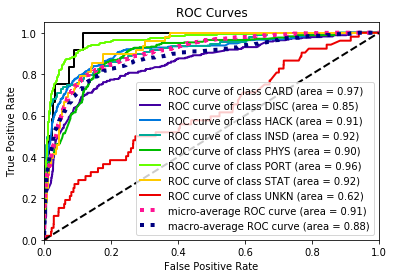

In [50]:
probas = nb.predict_proba(X_test)
skplt.plot_roc_curve(y_true=y_test, y_probas=probas)
plt.show()

In [51]:
def most_informative_feature_for_binanry_classification(vectorizer, classifier, n=50):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print "========================================="

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binanry_classification(tfidf_vectorizer, nb, n=10)

('CARD', -11.849199914019646, u'00')
('CARD', -11.849199914019646, u'00 00')
('CARD', -11.849199914019646, u'00 central')
('CARD', -11.849199914019646, u'00 charges')
('CARD', -11.849199914019646, u'00 easter')
('CARD', -11.849199914019646, u'00 eastern')
('CARD', -11.849199914019646, u'00 edt')
('CARD', -11.849199914019646, u'00 est')
('CARD', -11.849199914019646, u'00 insurance')
('CARD', -11.849199914019646, u'00 mmore')
('DISC', -10.409488207410982, u'card')
('DISC', -10.482797069309084, u'skimming')
('DISC', -10.486608879672561, u'cards')
('DISC', -10.543585374321935, u'credit')
('DISC', -10.682631867976099, u'debit')
('DISC', -10.793193426944617, u'gas')
('DISC', -10.828396952526983, u'credit card')
('DISC', -10.850339739371254, u'skimming device')
('DISC', -10.861226410922724, u'charges')
('DISC', -10.886729986278953, u'customers')


## The best model is SVM

## Deploying to best Model

In [52]:
breaches_score = df_breaches.drop(['Breach_Type'], axis=1)
breaches_score.head()

,Description
0,"An external auditor lost a CD with names, Soci..."
1,"There are 67,000 TennCare \r\n enro..."
2,A laptop computer was stolen from a vehicle.
3,A Fidelity laptop used by a former Fidelity em...
4,A former contract worker of a Japanese commerc...


In [53]:
breaches_score.to_csv("breachscoring.csv",index=False, header=None)

In [54]:
# reading unlabeled data for classification

docs_new = []

openfile = open('breachscoring.csv', 'rb')

r = csv.reader(openfile)

for i in r:
    docs_new.append(i[0])
    
openfile.close()



In [55]:
# SVM is the best model to use  
unlabeled_tfidf = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
unlabeled_tfidf = unlabeled_tfidf.fit(x_train, y_train)
predicted = unlabeled_tfidf.predict(x_test)

In [56]:
# print the resulting model fit

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'An external auditor lost a CD with names, Social Security numbers and stock holdings in McAfee of current and former McAfee employees.\xc2\xa0 Three thousand current employees and 6,000 former employees were affected.\xc2\xa0 Current and former employees received two years of free credit monitoring services from Equifax.' => PORT
'There are 67,000 TennCare \r\r\n            enrollees at risk of identity theft after a courier service lost their \r\r\n            personal information. The lost information includes names, Social \r\r\n            Security Numbers, birthdays and addresses.' => HACK
'A laptop computer was stolen from a vehicle. \xc2\xa0' => PHYS
'A Fidelity laptop used by a former Fidelity employee was discarded and recovered by a non-affiliated person. The employee had taken the laptop home after believing it had been decommissioned from business use by Fidelity. Participants and beneficiaries of participants in the Dairy Farmers of America Defined Benefit plan had their 

'"You visited kp.org between November 16 and 28, 2016, and used our online Estimates tool. Due to a system error, there is a small chance that your name, age, address, and some information on how much you\xe2\x80\x99ve spent on health care this year may have been seen by another kp.org user. \xc2\xa0An update to the Estimates tool was made on November 16, 2016.\xc2\xa0 After the update, there was a small chance that a subsequent user of the tool may have viewed a previous user\xe2\x80\x99s information.\xc2\xa0 We discovered the problem on November 28, and immediately rolled back the update to keep similar errors from happening again.\xc2\xa0 \xc2\xa0What information was involved? \xc2\xa0We\xe2\x80\x99ve confirmed that no Social Security numbers or banking or claims information was seen by others. However, the following information may have been mistakenly seen by a kp.org visitor who used the tool after you:\xc2\xa0 First and last name, age (not date of birth), address, copay informat